<a href="https://www.bharathkreddy.com"><img align="left" src="https://i.imgur.com/axjt3Qe.png" alt="WWW.BHARARTHKREDDY.COM" title="www.bharathkreddy.com"></a>
# [www.bharathkreddy.com](https://www.bharathkreddy.com)

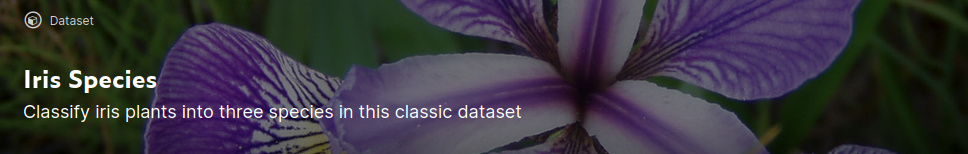

In [15]:
# Load libraries
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.metrics import classification_report
import pandas as pd

In [5]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [6]:
# Create standardizer
standardizer = StandardScaler()

# Standardize features
X_std = standardizer.fit_transform(X)

### Fit A Radius-Based Nearest Neighbor Classifier

In scikit-learn RadiusNeighborsClassifier is very similar to KNeighborsClassifier with the exception of two parameters. First, in RadiusNeighborsClassifier we need to specify the radius of the fixed area used to determine if an observation is a neighbor using radius. Unless there is some substantive reason for setting radius to some value, it is best to treat it like any other hyperparameter and tune it during model selection. The second useful parameter is outlier_label, which indicates what label to give an observation that has no observations within the radius - which itself can often be a useful tool for identifying outliers.

In [7]:
# Train a radius neighbors classifier
rnn = RadiusNeighborsClassifier(radius=.5, n_jobs=-1).fit(X_std, y)

In [8]:
y_pred = rnn.predict(X_std)

## Note how one vs all method is used to arrive at precision and recall values. 
### I would strongly recomend you try these calculations by hand.

In [11]:
print(classification_report(y_pred,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        51
           2       0.94      0.96      0.95        49

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [18]:
pd.crosstab(y_pred,y,rownames=['predicted'],colnames=['actual'])

actual,0,1,2
predicted,,,
0,50,0,0
1,0,48,3
2,0,2,47
